<a href="https://colab.research.google.com/github/prathviraj443s/Machine_Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code loads the MNIST dataset, a collection of handwritten digit images, and their corresponding labels, split into training and test sets. It sets up variables for images and labels for both training and testing purposes.







In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


These lines inspect the dimensions and sizes of the training and test datasets, displaying the shapes of the image arrays and the lengths of their associated label arrays.







In [2]:
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)
test_labels


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

The network architecture

This code snippet defines a neural network architecture with multiple layers using Keras, employing sigmoid activation functions for hidden layers and softmax for the output layer. It then mounts Google Drive for file access within the Google Colab environment.







In [3]:
from keras import models
from keras import layers
network = models.Sequential()
# Dense(32) is a fully-connected layer with 32 hidden units.
# in the first layer, you must specify the expected input data shape :
# here, 28 X 28=784 -dimensional vectors.
network.add(layers.Dense(32, activation='sigmoid', input_shape=(28 * 28, )))
network.add(layers.Dense(8, activation='sigmoid'))
network.add(layers.Dense(10, activation='softmax'))
network.summary()
from google.colab import drive
drive.mount('/content/drive')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 25474 (99.51 KB)
Trainable params: 25474 (99.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Mounted at /content/drive


The compilation step

This code compiles the defined neural network model, specifying the optimizer (Stochastic Gradient Descent), loss function (categorical cross-entropy), and evaluation metric (accuracy) to be used during training.

In [4]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Preparing the image data

This code preprocesses the image data by reshaping the arrays to flatten them into 1D vectors, normalizing pixel values to the range [0, 1] by dividing by 255, and converting the data type to float32 for both training and testing images.







In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255.
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255.

Preparing the labels

This code converts the categorical labels into one-hot encoded vectors for both the training and testing datasets using the to_categorical function from Keras utils module. The resulting labels are displayed, showing the transformation into a binary matrix format.

In [6]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
train_labels
test_labels = to_categorical(test_labels)
test_labels


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Training and Testing

In [7]:
network.fit(train_images, train_labels, epochs=160, batch_size=512)

Epoch 1/160
118/118 [==============================] - 3s 11ms/step - loss: 2.3282 - accuracy: 0.0986
Epoch 2/160
118/118 [==============================] - 2s 13ms/step - loss: 2.3052 - accuracy: 0.0961
Epoch 3/160
118/118 [==============================] - 1s 12ms/step - loss: 2.2932 - accuracy: 0.1116
Epoch 4/160
118/118 [==============================] - 1s 11ms/step - loss: 2.2846 - accuracy: 0.1876
Epoch 5/160
118/118 [==============================] - 1s 12ms/step - loss: 2.2774 - accuracy: 0.1950
Epoch 6/160
118/118 [==============================] - 1s 7ms/step - loss: 2.2705 - accuracy: 0.1995
Epoch 7/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2636 - accuracy: 0.2026
Epoch 8/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2566 - accuracy: 0.2149
Epoch 9/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2493 - accuracy: 0.2300
Epoch 10/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2416 - a

This code evaluates the trained neural network model on the test dataset, calculating the test loss and accuracy. The test accuracy is printed and displayed.







In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Accuracy: {:.5f} '.format(test_acc))
test_acc

313/313 [==============================] - 2s 2ms/step - loss: 0.6365 - accuracy: 0.8429
Test Accuracy: 0.84290 


0.8428999781608582

This code generates a visualization of the neural network model architecture and saves it as a PNG file named 'model.png'. It then trains the model using the training data, validating on a subset of the data. After training, it plots the training and validation accuracy as well as the training and validation loss over epochs, providing insights into the model's performance and potential overfitting.

The plot_model function generates a graphical representation of the model architecture, while the fit function trains the model. The training history is stored in the history_dict, and the accuracy and loss plots are displayed using Matplotlib.







Epoch 1/5
79/79 [==============================] - 1s 9ms/step - loss: 0.6502 - accuracy: 0.8388 - val_loss: 0.6357 - val_accuracy: 0.8428
Epoch 2/5
79/79 [==============================] - 1s 7ms/step - loss: 0.6483 - accuracy: 0.8394 - val_loss: 0.6339 - val_accuracy: 0.8431
Epoch 3/5
79/79 [==============================] - 1s 7ms/step - loss: 0.6465 - accuracy: 0.8397 - val_loss: 0.6322 - val_accuracy: 0.8435
Epoch 4/5
79/79 [==============================] - 1s 9ms/step - loss: 0.6447 - accuracy: 0.8402 - val_loss: 0.6305 - val_accuracy: 0.8441
Epoch 5/5
79/79 [==============================] - 1s 7ms/step - loss: 0.6429 - accuracy: 0.8408 - val_loss: 0.6288 - val_accuracy: 0.8445
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


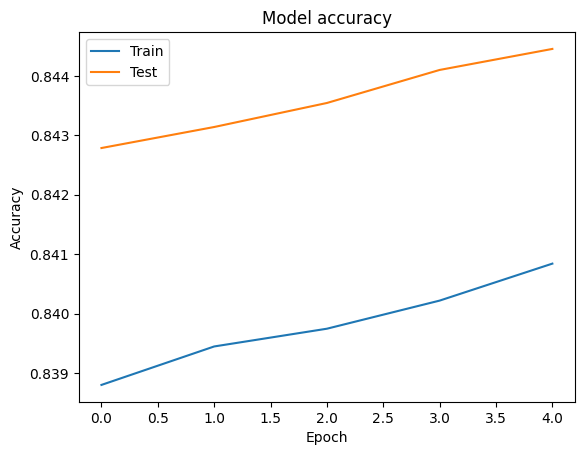

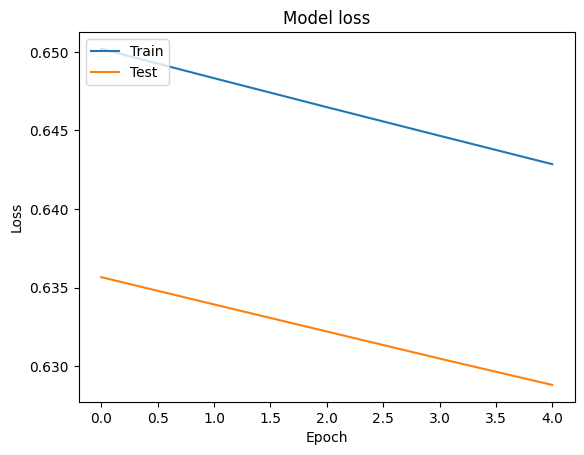

In [9]:
from keras.utils import plot_model
plot_model(network, to_file='model.png')
import matplotlib.pyplot as plt
history =network.fit(train_images, train_labels, validation_split=0.33,epochs=5, batch_size=512)
history_dict = history.history
print(history_dict.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
